In [1]:
#Tổng hợp Decision tree - Starquest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
print("ok")

ok


In [2]:
'''IMPORT DATA'''
df = pd.read_csv('heart_disease.csv')
df.head()
#print(df.describe())
print(df.isnull().sum())
df.dtypes

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [3]:
'''split data'''
x = df.drop('condition', axis = 'columns')
y = df['condition']

In [4]:
'''One_hot encoding'''
df['ca'].unique()
x = pd.get_dummies(x, columns = ['cp',
                                'restecg',
                                'slope',
                                'thal'])
y_ = y >0
y[y_] = 1
#y.head() #set cac gia tri >0 deu = 1

C:\Users\ainzo\AppData\Local\Temp\ipykernel_1772\2742699290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_] = 1


['age' 'sex' 'trestbps' 'chol' 'fbs' 'thalach' 'exang' 'oldpeak' 'ca'
 'cp_0' 'cp_1' 'cp_2' 'cp_3' 'restecg_0' 'restecg_1' 'restecg_2' 'slope_0'
 'slope_1' 'slope_2' 'thal_0' 'thal_1' 'thal_2']


Text(33.22222222222222, 0.5, 'Truth')

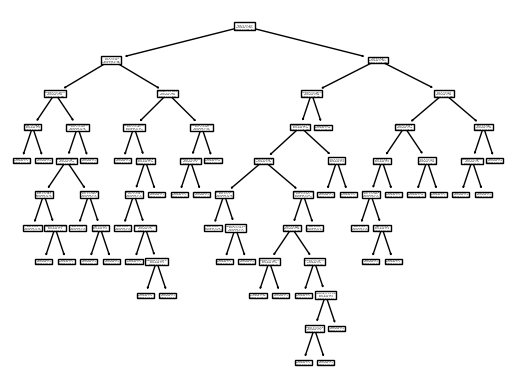

<Figure size 2000x1600 with 0 Axes>

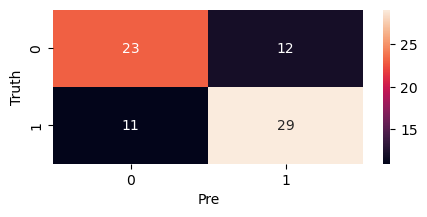

In [5]:
'''build a preliminary classification tree'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)
dtree = DecisionTreeClassifier(max_depth = 10)
dtree.fit(x_train, y_train)
print(x_train.columns.values)
features = x_train.columns.values
from sklearn import tree
tree.plot_tree(dtree, feature_names = features)
plt.figure(figsize = (20,16))
'''evalue with confusion matrix'''
#bieu do de hieu confusion matrix
pre = dtree.predict(x_test)
cf = confusion_matrix(y_test, pre)
import seaborn as sn
plt.figure(figsize = (5,2))
sn.heatmap(cf, annot = True)
plt.xlabel('Pre')
plt.ylabel('Truth')


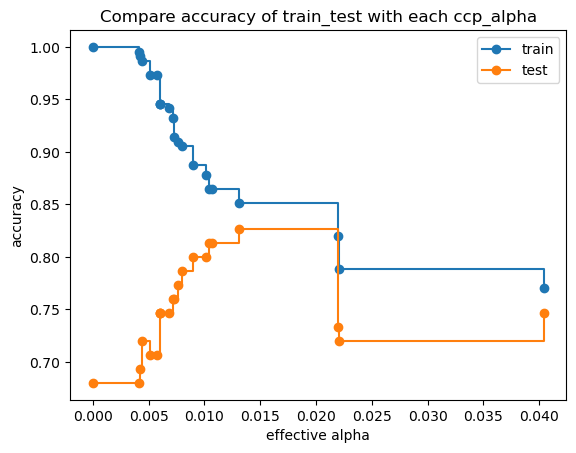

'clf = DecisionTreeClassifier(random_state=0)\npath = clf.cost_complexity_pruning_path(x_train, y_train)\nccp_alphas, impurities = path.ccp_alphas, path.impurities\nclfs = []\nfor ccp_alpha in ccp_alphas:\n    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)\n    clf.fit(x_train, y_train)\n    clfs.append(clf)\nprint(\n    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(\n        clfs[-1].tree_.node_count, ccp_alphas[-1]\n    )\n)\ntrain_scores = [clf.score(x_train, y_train) for clf in clfs]\ntest_scores = [clf.score(x_test, y_test) for clf in clfs]\n\nfig, ax = plt.subplots()\nax.set_xlabel("alpha")\nax.set_ylabel("accuracy")\nax.set_title("Accuracy vs alpha for training and testing sets")\nax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")\nax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")\nax.legend()\nplt.show()'

In [17]:
'''Vấn đề cắt tỉa cành - Pruning Tree'''
path_train = dtree.cost_complexity_pruning_path(x_train, y_train)

dtree_arr = []
ccp_alphas = path_train.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = alpha)
    clf.fit(x_train, y_train)
    dtree_arr.append(clf)
train_score = [clf.score(x_train, y_train) for clf in dtree_arr]
test_score = [clf.score(x_test, y_test) for clf in dtree_arr] 

fig, ax = plt.subplots()
ax.set_xlabel("effective alpha")
ax.set_ylabel("accuracy")
ax.set_title("Compare accuracy of train_test with each ccp_alpha")
ax.plot(ccp_alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

'''clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()'''